In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import gzip
import struct
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
import sklearn
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import accuracy_score

In [2]:
# Define mean and standard deviation for the two categories
mean_category1 = [1, 1]
mean_category2 = [5, 5]
std_dev = 1

# Generate 2D dataset for each category
category1_data = np.random.normal(mean_category1, std_dev, size=(100, 2))
category2_data = np.random.normal(mean_category2, std_dev, size=(100, 2))

In [3]:
combined_data = np.vstack((category1_data, category2_data))

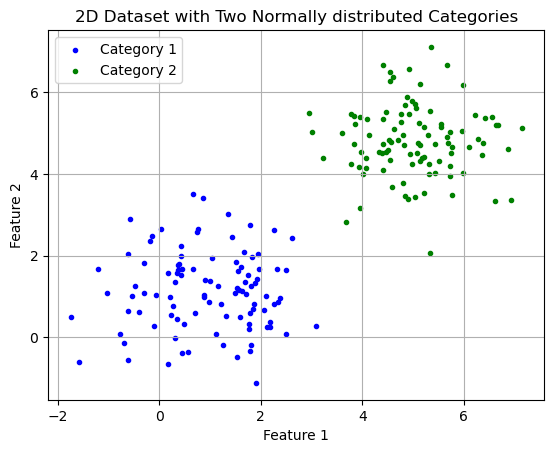

In [4]:
# Plot the generated dataset
plt.scatter(category1_data[:, 0], category1_data[:, 1], label='Category 1', color='blue', marker='.')
plt.scatter(category2_data[:, 0], category2_data[:, 1], label='Category 2', color='green', marker='.')
plt.title('2D Dataset with Two Normally distributed Categories')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid('True')
plt.show()

In [5]:
def euclidean_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    distance = np.sqrt(np.sum((b - a)**2))
    return distance

In [6]:
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices, :]
    return centroids

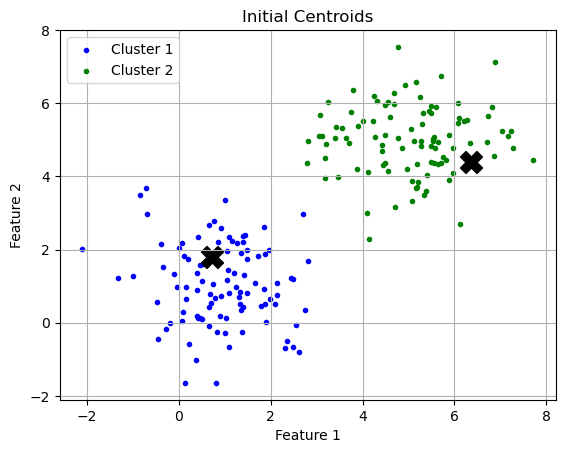

In [7]:
category1_data = np.random.normal(mean_category1, std_dev, size=(100, 2))
category2_data = np.random.normal(mean_category2, std_dev, size=(100, 2))

# Combine the data row-wise to create a single dataset
combined_data = np.vstack((category1_data, category2_data))
plt.scatter(category1_data[:, 0], category1_data[:, 1], label='Cluster 1', color='blue', marker='.')
plt.scatter(category2_data[:, 0], category2_data[:, 1], label='Cluster 2', color='green', marker='.')

# Initialize centroids
k = 2
centroids = initialize_centroids(combined_data, k)

# Plot centroids with markers
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=250, color='black')
plt.title('Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
def assign_cluster(data, centroids):
    distances = np.zeros((data.shape[0], len(centroids)))
    # Calculate distances from each point to each centroid
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.apply_along_axis(lambda x: euclidean_distance(x, centroid), 1, data)

    # Assign each point to the closest centroid
    assigned_clusters = np.argmin(distances, axis=1)
    
    return assigned_clusters

In [9]:
def update_centroids(data, assigned_clusters, k):
    updated_centroids = np.zeros((k, data.shape[1]))
    
    for cluster in range(k):
        cluster_points = data[assigned_clusters == cluster]
        if len(cluster_points) > 0:
            updated_centroids[cluster] = np.mean(cluster_points, axis=0)
    
    return updated_centroids

In [10]:
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    old_centroids = centroids.copy()

    for i in range(max_iterations):
        # Assign points to clusters
        assignments = assign_cluster(data, centroids)

        # Update centroids
        centroids = update_centroids(data, assignments, k)

        # Check for convergence
        if np.array_equal(centroids, old_centroids):
            break

        old_centroids = centroids.copy()

    return assignments, centroids
# Apply the K-means algorithm on the generated data
k = 2
assignments, final_centroids = kmeans(combined_data, k)

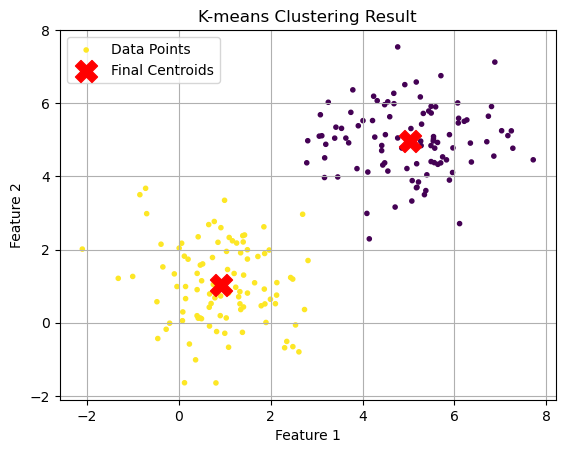

In [11]:
# Visualize the result
plt.scatter(combined_data[:, 0], combined_data[:, 1], c=assignments, cmap='viridis', label='Data Points', marker='.')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X',s=250, color='red', label='Final Centroids')
plt.title('K-means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
def read_idx(MNIST):
    with gzip.open(MNIST, 'rb') as f:
        zero, data_type, dims= struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I',f.read(4)) [0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [13]:
#Specifying the folder path
folder_path = 'mnist'

#Constructing the full file paths for the MNIST dataset
train_images_path = read_idx('HW 4/train-images-idx3-ubyte.gz')
train_labels_path = read_idx('HW 4/train-labels-idx1-ubyte.gz')
test_images_path = read_idx('HW 4/t10k-images-idx3-ubyte.gz')
test_labels_path = read_idx('HW 4/t10k-labels-idx1-ubyte.gz')

In [14]:
train_images = read_idx('HW 4/train-images-idx3-ubyte.gz')
train_labels = read_idx('HW 4/train-labels-idx1-ubyte.gz')
test_images = read_idx('HW 4/t10k-images-idx3-ubyte.gz')
test_labels = read_idx('HW 4/t10k-labels-idx1-ubyte.gz')

In [15]:
#Normalizing pixel values to be between 0 and 1
train_images_normalized = train_images / 255.0 
test_images_normalized = test_images / 255.0 

#Converting labels to one-hot encoding using NumPy eye function
num_classes = 10
input_size = 784

#Reshaping the train and test normalized images
train_images_normalized = train_images_normalized.reshape(-1,input_size)
test_images_normalized = test_images_normalized.reshape(-1,input_size)

#Creating one-hot encoding matrices for training and testing labels
train_labels_one_hot = np.eye(num_classes)[train_labels]

#Printing shapes after normalization and one-hot encoding
print("Normalized Training Images Shape:", train_images_normalized.shape)
print("Normalized Testing Images Shape:", test_images_normalized.shape)

Normalized Training Images Shape: (60000, 784)
Normalized Testing Images Shape: (10000, 784)


In [16]:
# Define the number of clusters (K)
k_clusters = 10

# Initialize K-means model
kmeans = KMeans(n_clusters=k_clusters, n_init=10)

# Record start time
start_time = datetime.datetime.now()

# Train K-means model
kmeans.fit(train_images_normalized)

# Record end time
end_time = datetime.datetime.now()

# Calculate training time
training_time = end_time - start_time
print(f"Training time: {training_time}")

# Get cluster assignments for the entire dataset
cluster_assignments = kmeans.predict(train_images_normalized)

Training time: 0:00:20.669523


In [17]:
# Define different values of K
k_values = [10, 16, 64, 256]

In [18]:
for k_clusters in k_values:
    # Initialize MiniBatchKMeans model
    kmeans_mini_batch = MiniBatchKMeans(n_clusters=k_clusters, random_state=42, batch_size=100, max_iter=100, n_init=10)

    # Record start time
    start_time = datetime.datetime.now()

    # Train MiniBatchKMeans model
    kmeans_mini_batch.fit(train_images_normalized)

    # Record end time
    end_time = datetime.datetime.now()

    # Calculate training time
    training_time = end_time - start_time
    print(f"Training time for K={k_clusters}: {training_time}")
    
    # Get cluster assignments for the entire dataset
    cluster_assignments = kmeans_mini_batch.predict(train_images_normalized)

    # Compute the inertia value
    inertia_value = kmeans_mini_batch.inertia_
    print(f"Inertia for K={k_clusters}: {inertia_value}")
    print()

Training time for K=10: 0:00:00.455498
Inertia for K=10: 2392311.7149700825

Training time for K=16: 0:00:00.557325
Inertia for K=16: 2196889.5465967297

Training time for K=64: 0:00:01.039660
Inertia for K=64: 1811105.8812437314

Training time for K=256: 0:00:02.969795
Inertia for K=256: 1517218.9439527402



In [25]:
best_k_clusters = 256
# Initialize MiniBatchKMeans model with the best K
best_kmeans_model = MiniBatchKMeans(n_clusters=best_k_clusters, random_state=42, batch_size=100, max_iter=100, n_init = 10)

# Train the model on the training data
best_kmeans_model.fit(test_images_normalized)

# Get cluster assignments for the test dataset
best_cluster_labels = assign_labels_to_clusters(best_kmeans.labels_, test_labels, best_k_acc)

# Compute the inertia value for the test dataset
test_inertia_value = best_kmeans_model.inertia_
print(f"Inertia for the test dataset with K={best_k_clusters}: {test_inertia_value}")

Inertia for the test dataset with K=256: 247797.08376185526


In [20]:
def assign_labels_to_clusters(clusters, true_labels, k):
    labels = np.zeros_like(clusters)
    for i in range(k):
        mask = (clusters == i)
        # Assign the most common label to the centroid
        labels[mask] = np.bincount(true_labels[mask]).argmax()
        return labels

In [26]:
def manual_accuracy_score(true_labels, predicted_labels):
    correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels))
    accuracy = correct_predictions / len(true_labels)
    return accuracy*100

In [27]:
# Choose the best K based on accuracy (higher is better)
best_k_acc = 256  # Replace with the value of K that maximizes accuracy

# Apply the best model to the test dataset
best_kmeans = MiniBatchKMeans(n_clusters=best_k_acc, random_state=42)
best_kmeans.fit(test_images_normalized)

# Assign labels to clusters based on the most common true label
best_cluster_labels = assign_labels_to_clusters(best_kmeans.labels_, test_labels, best_k_acc)

# Calculate accuracy based on cluster-based labels
best_accuracy = manual_accuracy_score(test_labels, best_cluster_labels)
print(f"Best Model based on accuracy (K = {best_k_acc}), Accuracy on Test Data: {best_accuracy}")

/Users/harshitahiremath/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Best Model based on accuracy (K = 256), Accuracy on Test Data: 10.0
